# Exercise 1: Data Exploration and Preprocessing


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import numpy as np

In [3]:
df = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

Preprocessing

In [5]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [6]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [7]:
features = df.drop('diagnosis', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [8]:
data_scaled = pd.DataFrame(features_scaled, columns=features.columns)
data_scaled['diagnosis'] = df['diagnosis']

In [9]:
X = data_scaled.drop('diagnosis', axis=1)
y = data_scaled['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

# Exercise 2: Implementing the K-Nearest Neighbors (KNN) Model

Implementing a KNN Classifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with n_neighbors = 5: {accuracy:.4f}')

Accuracy with n_neighbors = 5: 0.9474


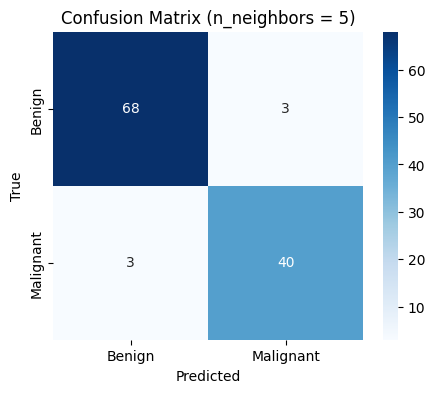

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix (n_neighbors = 5)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Experiment with Different Values of n_neighbors

Accuracy with n_neighbors = 3: 0.9474
Accuracy with n_neighbors = 5: 0.9474
Accuracy with n_neighbors = 7: 0.9474
Accuracy with n_neighbors = 9: 0.9649


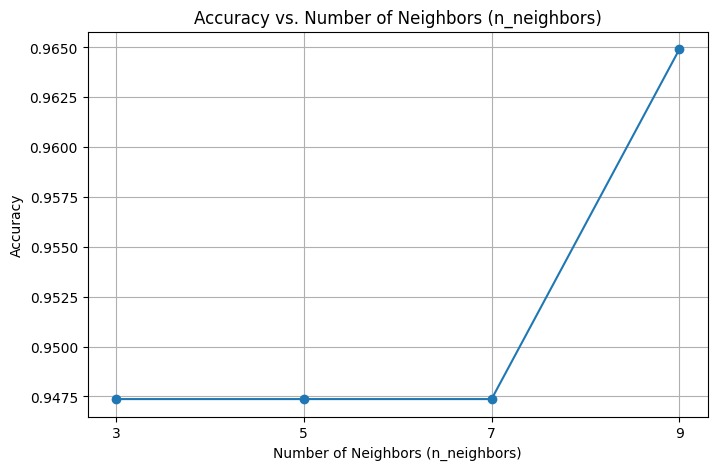

In [22]:
neighbors = [3, 5, 7, 9]
accuracies = []

for n in neighbors:

    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy with n_neighbors = {n}: {accuracy:.4f}')

# Convert accuracies to a 1D
accuracies = list(accuracies)

# Plotting the graph of accuracy vs n_neighbors
plt.figure(figsize=(8, 5))
plt.plot(neighbors, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors (n_neighbors)')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.grid(True)
plt.show()


In [23]:
optimal_n = neighbors[accuracies.index(max(accuracies))]
print(f'The optimal value of n_neighbors is: {optimal_n}')

The optimal value of n_neighbors is: 9


# Exercise 3: Implementing Logistic Regression

Implement a Logistic Regression Classifier

In [25]:
logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [26]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy of Logistic Regression: {accuracy_logreg:.4f}')

Accuracy of Logistic Regression: 0.9737


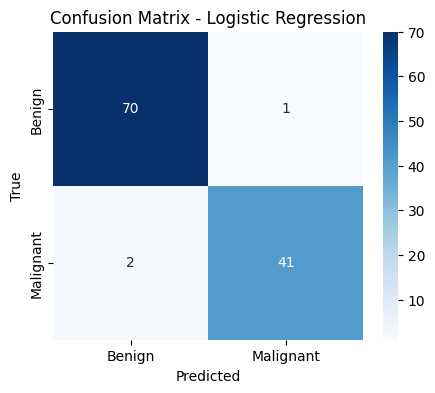

In [27]:
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [28]:
print('Classification Report - Logistic Regression:')
print(classification_report(y_test, y_pred_logreg, target_names=['Benign', 'Malignant']))

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        71
   Malignant       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Comparison of KNN and Logistic Regression

In [31]:
knn_best = KNeighborsClassifier(n_neighbors=5)
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

In [32]:
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

In [33]:
print(f"KNN Accuracy: {accuracy_knn:.4f}, Precision: {precision_knn:.4f}, Recall: {recall_knn:.4f}, F1-Score: {f1_knn:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}, Precision: {precision_logreg:.4f}, Recall: {recall_logreg:.4f}, F1-Score: {f1_logreg:.4f}")

KNN Accuracy: 0.9474, Precision: 0.9302, Recall: 0.9302, F1-Score: 0.9302
Logistic Regression Accuracy: 0.9737, Precision: 0.9762, Recall: 0.9535, F1-Score: 0.9647


In [34]:
if f1_logreg > f1_knn:
    print("\nLogistic Regression performs better in terms of F1-score.")
elif f1_knn > f1_logreg:
    print("\nKNN performs better in terms of F1-score.")
else:
    print("\nBoth models have the same F1-score.")


Logistic Regression performs better in terms of F1-score.


# Exercise 4: Hyperparameter Tuning and Cross-Validation

In [36]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [37]:
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [38]:
best_knn_params = grid_search_knn.best_params_
best_knn_score = grid_search_knn.best_score_

In [39]:
print(f"Best Parameters for KNN: {best_knn_params}")
print(f"Best Cross-Validated Accuracy for KNN: {best_knn_score}")

Best Parameters for KNN: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best Cross-Validated Accuracy for KNN: 0.9648351648351647


In [40]:
log_reg = LogisticRegression(max_iter=1000)

In [41]:
log_reg_cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

In [42]:
print(f"Cross-Validated Accuracy for Logistic Regression: {log_reg_cv_scores.mean()}")

Cross-Validated Accuracy for Logistic Regression: 0.9758241758241759


In [43]:
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy for Logistic Regression: {test_accuracy}")

Test Set Accuracy for Logistic Regression: 0.9736842105263158


# Exercise 5: Decision Boundary Visualization

In [45]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [58]:
def plot_decision_boundary(X, y, model, title):
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

        # Create a meshgrid for plotting the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

        # Predict on the meshgrid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

        # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()



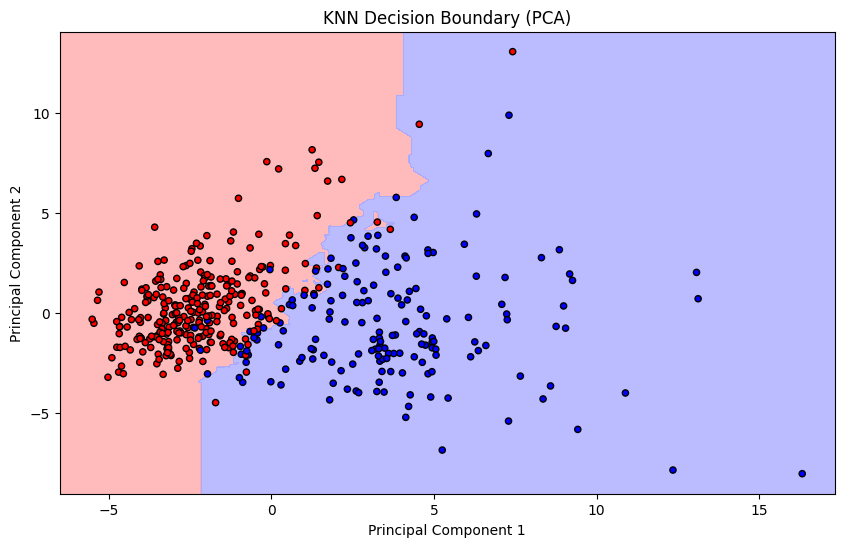

In [59]:
knn_pca = KNeighborsClassifier(n_neighbors=best_knn_params['n_neighbors'],
                               weights=best_knn_params['weights'],
                               p=best_knn_params['p'])
knn_pca.fit(X_train_pca, y_train)
plot_decision_boundary(X_train_pca, y_train, knn_pca, title="KNN Decision Boundary (PCA)")


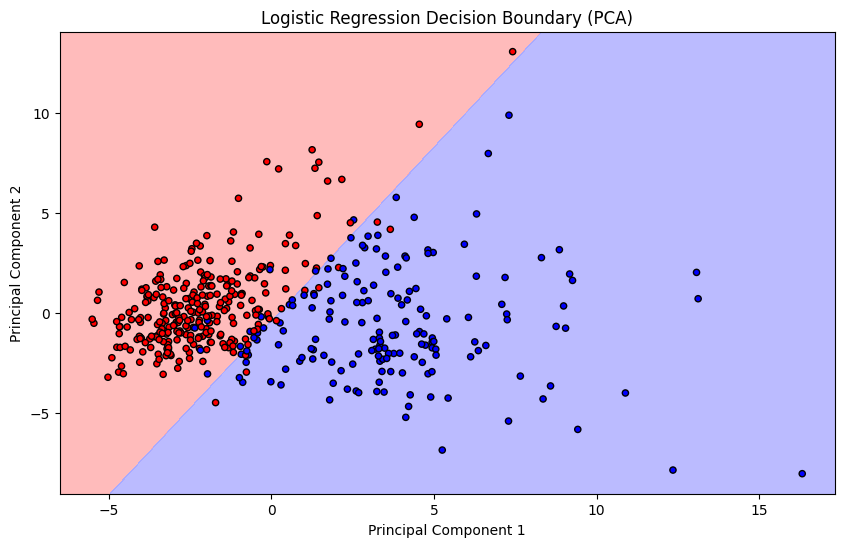

In [60]:
log_reg_pca = LogisticRegression(max_iter=1000)
log_reg_pca.fit(X_train_pca, y_train)
plot_decision_boundary(X_train_pca, y_train, log_reg_pca, title="Logistic Regression Decision Boundary (PCA)")